# Import Statements

In [1]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils import shuffle
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import time
from itertools import cycle

# Import train data from local

In [2]:
data = sio.loadmat('X_train.mat')
X_train = np.matrix(data['X_train'])

data = sio.loadmat('Y_train.mat')
Y_train = np.matrix(data['Y_train'])

# Split train data into test data and train data

In [3]:
random_state = np.random.RandomState(0)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size= 0.3, random_state = random_state)
n_classes = Y_test.shape[1]

# Create the SVM model

In [4]:
start_time = time.clock()
model1 = OneVsRestClassifier(SVC(kernel='poly'))
model1.fit(X_train, Y_train)

C:\Users\Ankit\Anaconda2\lib\site-packages\sklearn\multiclass.py:70: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
C:\Users\Ankit\Anaconda2\lib\site-packages\sklearn\multiclass.py:70: UserWarning: Label not 9 is present in all training examples.
  str(classes[c]))
C:\Users\Ankit\Anaconda2\lib\site-packages\sklearn\multiclass.py:70: UserWarning: Label not 12 is present in all training examples.
  str(classes[c]))
C:\Users\Ankit\Anaconda2\lib\site-packages\sklearn\multiclass.py:70: UserWarning: Label not 23 is present in all training examples.
  str(classes[c]))
C:\Users\Ankit\Anaconda2\lib\site-packages\sklearn\multiclass.py:70: UserWarning: Label not 29 is present in all training examples.
  str(classes[c]))
C:\Users\Ankit\Anaconda2\lib\site-packages\sklearn\multiclass.py:70: UserWarning: Label not 31 is present in all training examples.
  str(classes[c]))
C:\Users\Ankit\Anaconda2\lib\site-packages\sklearn\multiclass.py:70: UserWarning: Label not 34 i

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

# Predict the actual values for test data

In [5]:
predicted = model1.predict(X_test)

In [6]:
accuracy = 0
Tp = 0
Fp = 0
Fn = 0
Tn = 0

for ptr in range(0, Y_test.shape[0]):
    
    accuracy += len(np.where(Y_test[ptr, :] == predicted[ptr, :].reshape((1, predicted[ptr,:].size)))[1])
    
    for x in range(0, n_classes):
        if Y_test[ptr, x] == 1 & predicted[ptr, x] == 1:
            Tp += 1
        if Y_test[ptr, x] == 0 & predicted[ptr, x] == 0:
            Tn += 1
        if Y_test[ptr, x] == 0 & predicted[ptr, x] == 1:
            Fp += 1
        if Y_test[ptr, x] == 1 & predicted[ptr, x] == 0:
            Fn += 1

Precision = (Tp / float(Tp + Fp))
Recall = (Tp / float(Tp + Fn))

print "Accuracy: ", str(accuracy * 100.0 / (Y_test.shape[0] * Y_test.shape[1]))
print "Precision: ", str(Precision)
print "Recall: ", str(Recall)

Accuracy:  99.0646780371
Precision:  1.0
Recall:  0.000288144302667


# Print execution time

In [7]:
end_time = time.clock()
print end_time - start_time, "seconds"

232.677628408 seconds


# Create the SVM model

In [8]:
start_time = time.clock()
model2 = OneVsRestClassifier(svm.SVC(kernel = 'rbf', probability = True, random_state = random_state))
y_score = model2.fit(X_train, Y_train).decision_function(X_test)

# Compute Precision-Recall and plot curve

In [9]:
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

C:\Users\Ankit\Anaconda2\lib\site-packages\sklearn\metrics\ranking.py:412: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\Ankit\Anaconda2\lib\site-packages\sklearn\metrics\ranking.py:95: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


# Compute micro-average ROC curve and ROC area

In [10]:
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel().reshape((Y_test[:, :].size, 1)), 
                                                               y_score.ravel().reshape((y_score[:, :].size, 1)))
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")

# Plot Precision-Recall curve

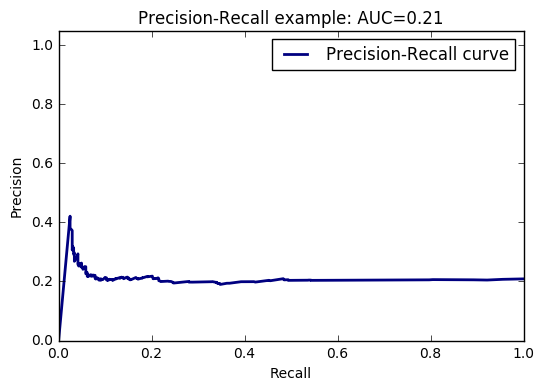

In [15]:
plt.clf()
plt.plot(recall[0], precision[0], lw = 2, color = 'navy', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="upper right")
plt.show()

# Plot Precision-Recall curve for each class

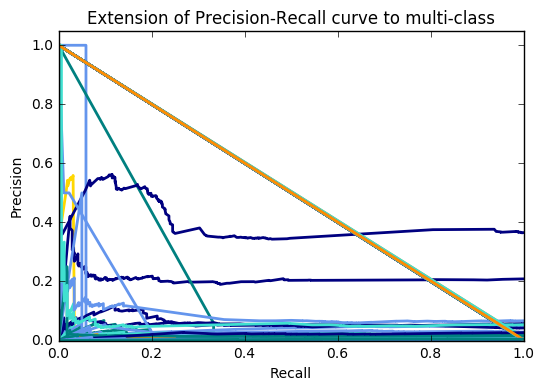

In [12]:
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.clf()
plt.plot(recall["micro"], precision["micro"], color='gold', lw = 2,
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw = 2,
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
#plt.legend(loc="lower right")
plt.show()

# Print execution time

In [13]:
end_time = time.clock()
print end_time - start_time, "seconds"

885.32761034 seconds
